In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string 
import urllib.request

In [2]:
x = urllib.request.urlopen("https://r-stat-sc-donnees.github.io/LesMiserables1.txt")
livre=str(x.read())
print(livre)

b'\xef\xbb\xbfThe Project Gutenberg EBook of Les mis\xc3\xa9rables Tome I, by Victor Hugo\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Les mis\xc3\xa9rables Tome I\r\n       Fantine\r\n\r\nAuthor: Victor Hugo\r\n\r\nRelease Date: January 10, 2006 [EBook #17489]\r\n[Date last updated: July 28, 2010]\r\n\r\nLanguage: French\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK LES MIS\xc3\x89RABLES TOME I ***\r\n\r\n\r\n\r\n\r\nProduced by www.ebooksgratuits.com and Chuck Greif\r\n\r\n\r\n\r\n\r\nVictor Hugo\r\n\r\nLES MIS\xc3\x89RABLES\r\n\r\nTome I--FANTINE\r\n\r\n(1862)\r\n\r\n\r\nTABLE DES MATI\xc3\x88RES\r\n\r\nLivre premier--Un juste\r\n\r\nChapitre I Monsieur Myriel\r\nChapitre II Monsieur Myriel devient monseigneur Bienvenu\r\nChapitre III \xc3\x8

## Metttre le texte en minuscule

In [3]:
livre = livre.lower()

## Suppression de la pontuation

In [4]:
livre = livre.replace(".", "")\
        .replace(",", "")\
        .replace(";", "")\
        .replace(":", "")\
        .replace("!", "")\
        .replace("?", "")\
        .replace("\"", "")\
        .replace("'", "")\
        .replace("[", "")\
        .replace("]", "")\
        .replace("(", "")\
        .replace(")", "")\
        .replace("*", "")\
        .replace("-","")\
        .replace("_","")\
        .replace("\\r","")\
        .replace("\\n","")\
        .replace("\\","")\

In [5]:
livre

'bxefxbbxbfthe project gutenberg ebook of les misxc3xa9rables tome i by victor hugothis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergorgtitle les misxc3xa9rables tome i       fantineauthor victor hugorelease date january 10 2006 ebook #17489date last updated july 28 2010language french start of this project gutenberg ebook les misxc3x89rables tome i produced by wwwebooksgratuitscom and chuck greifvictor hugoles misxc3x89rablestome ifantine1862table des matixc3x88reslivre premierun justechapitre i monsieur myrielchapitre ii monsieur myriel devient monseigneur bienvenuchapitre iii xc3x80 bon xc3xa9vxc3xaaque dur xc3xa9vxc3xaachxc3xa9chapitre iv les oeuvres semblables aux paroleschapitre v que monseigneur bienvenu faisait durer trop longtemps ses     soutaneschapitre vi par qui il faisait garder sa maison

## Diviser le texte en mot

In [6]:
mots = livre.split(" ")

In [7]:
mots

['bxefxbbxbfthe',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'les',
 'misxc3xa9rables',
 'tome',
 'i',
 'by',
 'victor',
 'hugothis',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'withalmost',
 'no',
 'restrictions',
 'whatsoever',
 '',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'orreuse',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'includedwith',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'wwwgutenbergorgtitle',
 'les',
 'misxc3xa9rables',
 'tome',
 'i',
 '',
 '',
 '',
 '',
 '',
 '',
 'fantineauthor',
 'victor',
 'hugorelease',
 'date',
 'january',
 '10',
 '2006',
 'ebook',
 '#17489date',
 'last',
 'updated',
 'july',
 '28',
 '2010language',
 'french',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'les',
 'misxc3x89rables',
 'tome',
 'i',
 'produced',
 'by',
 'wwwebooksgratuitscom',
 'and',
 'chuck',
 'greifvictor',
 'hugoles',
 'misxc3x89rablesto

## Le nombre des mots (le, un,et,est,il) dans le document

In [8]:
nle = sum([1 for wi in mots if wi == "le"])
nun = sum([1 for wi in mots if wi == "un"])
net = sum([1 for wi in mots if wi == "et"])
nest = sum([1 for wi in mots if wi == "est"])
nil = sum([1 for wi in mots if wi == "il"])

In [9]:
print("Le nombre de mots de :\nun=%d, le=%d, et=%d, est=%d, il=%d"%(nun, nle, net, nest, nil))

Le nombre de mots de :
un=1242, le=2105, et=2557, est=404, il=1825


## Tracer les proportions 

In [10]:
x = range(len(mots))

In [11]:
dico = np.unique(mots)

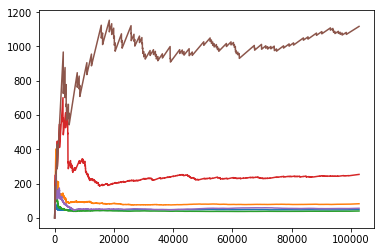

In [15]:
for w in ["le", "un", "et", "est", "il", "jour"]:
    indicat = [1 if wi == w else 0 for wi in mots]
    proportion = [ni/(i+1) for ni, i in enumerate(np.cumsum(indicat))]
    plt.plot(x, proportion)

## Nous ne pouvons pas appliqué le théoréme central limite car les mots n'ont pas la meme distribution

## Que devons-nous faire sur le texte pour appliquer le TCL ?

supprimer Les « stop-words ». Ils sont des mots qui n'apportent pas de sens lors de l'analyse lexicale d'un texte. Ce sont donc des mots que l'on exclut généralement lors de l'indexation ou de l'analyse d'un texte